In [10]:
#importing the necessary libraries

from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [34]:
Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }

In [12]:
df = DataFrame(Data, columns = ['x', 'y'])

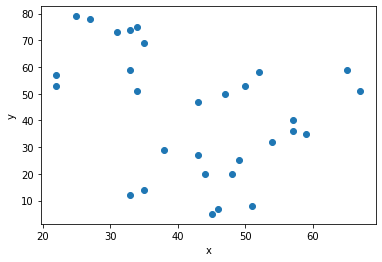

In [13]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 3).fit(df) # three clusters
centroids = kmeans.cluster_centers_
print ('centroids: \n \n', centroids)

centroids: 
 
 [[55.1 46.1]
 [43.2 16.7]
 [29.6 66.8]]


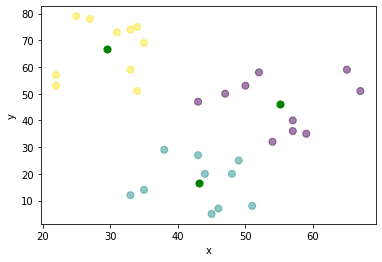

In [15]:
#visualizing the clusters
plt.scatter(df['x'], df['y'], c = kmeans.labels_.astype(float), s = 50, alpha = 0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'o', c = 'g', s = 50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

centroids: 
 
 [[27.75       55.        ]
 [43.2        16.7       ]
 [55.1        46.1       ]
 [30.83333333 74.66666667]]


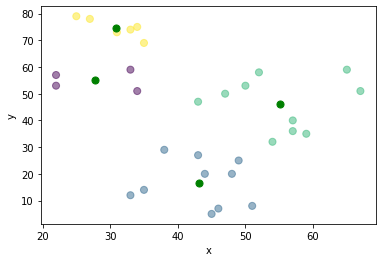

In [25]:
# into 4 clusters 

kmeans = KMeans(n_clusters = 4).fit(df) # four clusters
centroids = kmeans.cluster_centers_
print ('centroids: \n \n', centroids)

#visualizing the clusters
plt.scatter(df['x'], df['y'], c = kmeans.labels_.astype(float), s = 50, alpha = 0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'o', c = 'g', s = 50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Now, selecting the appropriate value of k by using various popular methods.

1. Elbow Method:

- calculates the within-cluster-sum of squared  (WSS) error for different values of k. 


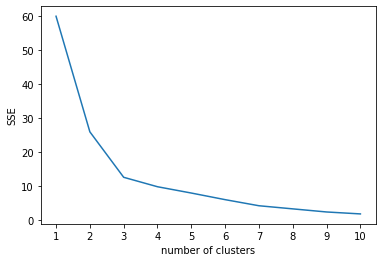

In [46]:
# first lets scale the feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# for plotting

import matplotlib.pyplot as plt

sse = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters = k).fit(df)
    
    kmeans.fit(scaled_features)
    sse.append (kmeans.inertia_) # inertial tells how far away the points within a cluster are.Smaller the inertia, better the clustering
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.show()


It appears that ther is an elbow from the number of clusters equal to 3. Hence, lets take the number of clusters to be 3. 

Note: as being said lower the value of SSE/inertia better the clustering, it is trival to create much more number of clusters. Hence, rule of thumb is that we select the number of clusters in the region lying the elbow formation (as shown in above curve at number of clusters nearly equal to 3).

centroids: 
 
 [[29.6 66.8]
 [55.1 46.1]
 [43.2 16.7]]


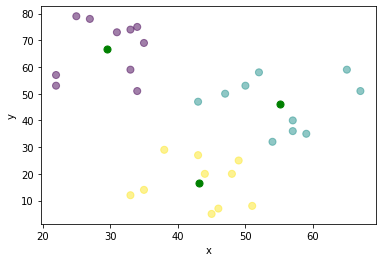

In [19]:
kmeans = KMeans(n_clusters = 3).fit(df) # three clusters
centroids = kmeans.cluster_centers_
print ('centroids: \n \n', centroids)

#visualizing the clusters
plt.scatter(df['x'], df['y'], c = kmeans.labels_.astype(float), s = 50, alpha = 0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'o', c = 'g', s = 50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

2. The Silhouette Coefficient Method:
It measures the cluter cohesion and seperation. It quantifies how well a data point fits into its assigned cluster based on following two factors:

1. How close the data point is to other points in the cluster? (like elbow method?)
2. How far away the data point is from points in other clusters? (mutual variance?)

Silhouette coefficient lies in the range of -1 to 1.

Larger the value better the classification (just opposite to SSE!). 

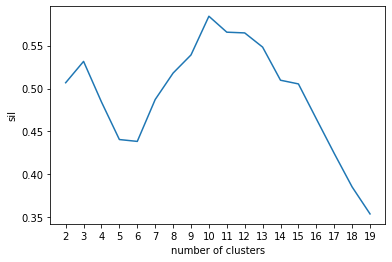

In [47]:

from sklearn.metrics import silhouette_score

sil = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 20):
  kmeans = KMeans(n_clusters = k).fit(scaled_features)
  labels = kmeans.labels_
  sil.append(silhouette_score(scaled_features, labels, metric = 'euclidean'))

# for plotting

import matplotlib.pyplot as plt

plt.plot(range(2, 20), sil)
plt.xticks(range(2, 20))
plt.xlabel('number of clusters')
plt.ylabel('sil')
plt.show()

It appears that when cluster size is around 10, the clustering performance is better. Lets look at k = 10

centroids: 
 
 [[26.         78.5       ]
 [44.4        24.2       ]
 [33.5        55.        ]
 [66.         55.        ]
 [47.33333333  6.66666667]
 [48.         52.        ]
 [34.         13.        ]
 [56.75       35.75      ]
 [33.25       72.75      ]
 [22.         55.        ]]


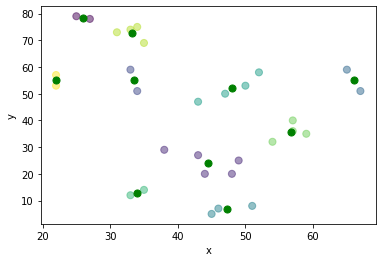

In [48]:
kmeans = KMeans(n_clusters = 10).fit(df)
centroids = kmeans.cluster_centers_
print ('centroids: \n \n', centroids)

#visualizing the clusters
plt.scatter(df['x'], df['y'], c = kmeans.labels_.astype(float), s = 50, alpha = 0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'o', c = 'g', s = 50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Now, merging two method with their respective curve in one figure

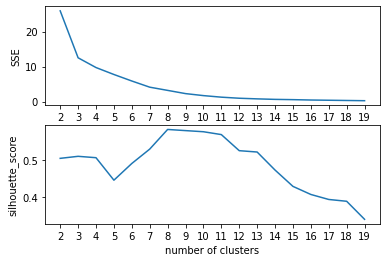

In [51]:
# first lets scale the feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# for plotting

import matplotlib.pyplot as plt

sse = []
for k in range (2, 20):
    kmeans = KMeans(n_clusters = k).fit(df)
    
    kmeans.fit(scaled_features)
    sse.append (kmeans.inertia_) # inertial tells how far away the points within a cluster are.Smaller the inertia, better the clustering

plt.subplot(2, 1, 1)   
plt.plot(range(2, 20), sse)
plt.xticks(range(2, 20))
plt.xlabel('number of clusters')
plt.ylabel('SSE')


from sklearn.metrics import silhouette_score

sil = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 20):
  kmeans = KMeans(n_clusters = k).fit(df)
  labels = kmeans.labels_
  sil.append(silhouette_score(df, labels, metric = 'euclidean'))

# for plotting

plt.subplot(2, 1, 2)

plt.plot(range(2, 20), sil)
plt.xticks(range(2, 20))
plt.xlabel('number of clusters')
plt.ylabel('silhouette_score')
plt.show()

Apparently, when the number of clusters is arround 8, the clustering is better. However, normally our intention during clustering is to group features in reasonable number of clusters. Hence, at this kind of situation context largely determines the optimal number of clusters. 